# Decision Trees

## The dataset

NACA airfoils are shapes of aircraft wings developed by the National Advisory Committee for Aeronautics (NACA). Design of airfoils must ensure stability and induce minimal drag. The data consists of different size NACA 0012 airfoils with measurements at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments. The following are the attributes measured for the different airfoils. 

This problem has the following inputs:
    1. Frequency, in Hertzs.
    2. Angle of attack, in degrees.
    3. Chord length, in meters.
    4. Free-stream velocity, in meters per second.
    5. Suction side displacement thickness, in meters.

The only output is:
    6. Scaled sound pressure level, in decibels. 
Each attribute is a feature. A decision tree for regression will be used for predictions.

Source: [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise#).

### The goal
The goal is to predict the sound pressure level in decibels (the only ouput variable) based on the input attributes. According to this research publication [Airfoil Self-Noise and Predictio](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19890016302.pdf), "airfoil self-noise is due to the interaction between an airfoil blade and the turbulence produced in its own boundary layer and near wake. It is the total noise produced when an airfoil encounters smooth nonturbulent inflow. The interest has been motivated by its importance to broadband helicopter rotor, wind turbine, and airframe noises." We're going to predict the scaled sound pressure of self-noise mechanisms using a decision tree.

## Import the necessary libraries

In [1]:
from sklearn.tree import DecisionTreeRegressor

Use `DecisionTreeRegressor` to create the tree.

In [2]:
from sklearn.model_selection import train_test_split

Use to split dataset into training and test datasets.

In [3]:
from sklearn.tree import export_graphviz 

Use `export_graphviz` to visualize the tree.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
matplotlib inline

Load the data into a dataframe. Before loading the data, open the file. Notice that there are no column headings. Add them using the `names` option in the `read_csv` function.

In [6]:
data = pd.read_csv('airfoil_self_noise.dat', sep='\t', names=['Frequency(Hz)', 
                                                              'Angle(deg)', 
                                                              'Chord(m)', 
                                                              'Velocity(m/s)',
                                                              'Suction(m)',
                                                              'Pressure(dec)'])

In [7]:
data.head()

,Frequency(Hz),Angle(deg),Chord(m),Velocity(m/s),Suction(m),Pressure(dec)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## Visualize the data

Create a visualization of the features to see how the data is distributed.

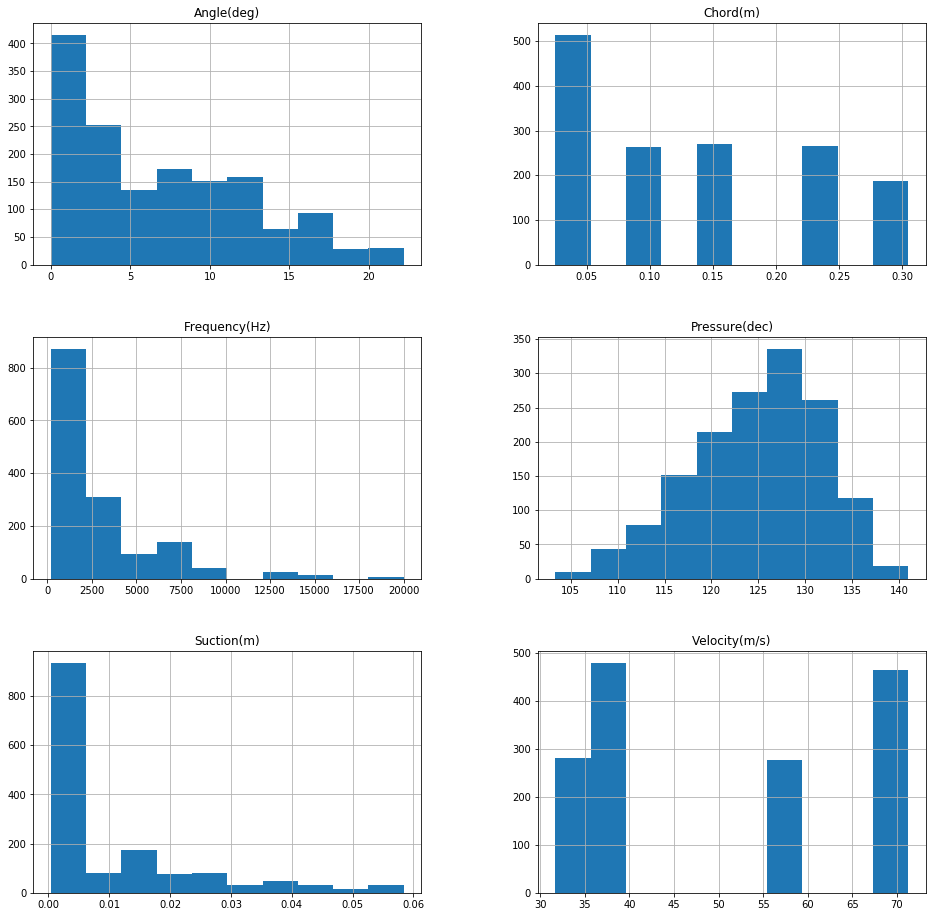

In [8]:
pd.DataFrame.hist(data, figsize=(16,16));

Look at the relationships between the features by plotting a scatter matrix.

In [9]:
from pandas.plotting import scatter_matrix

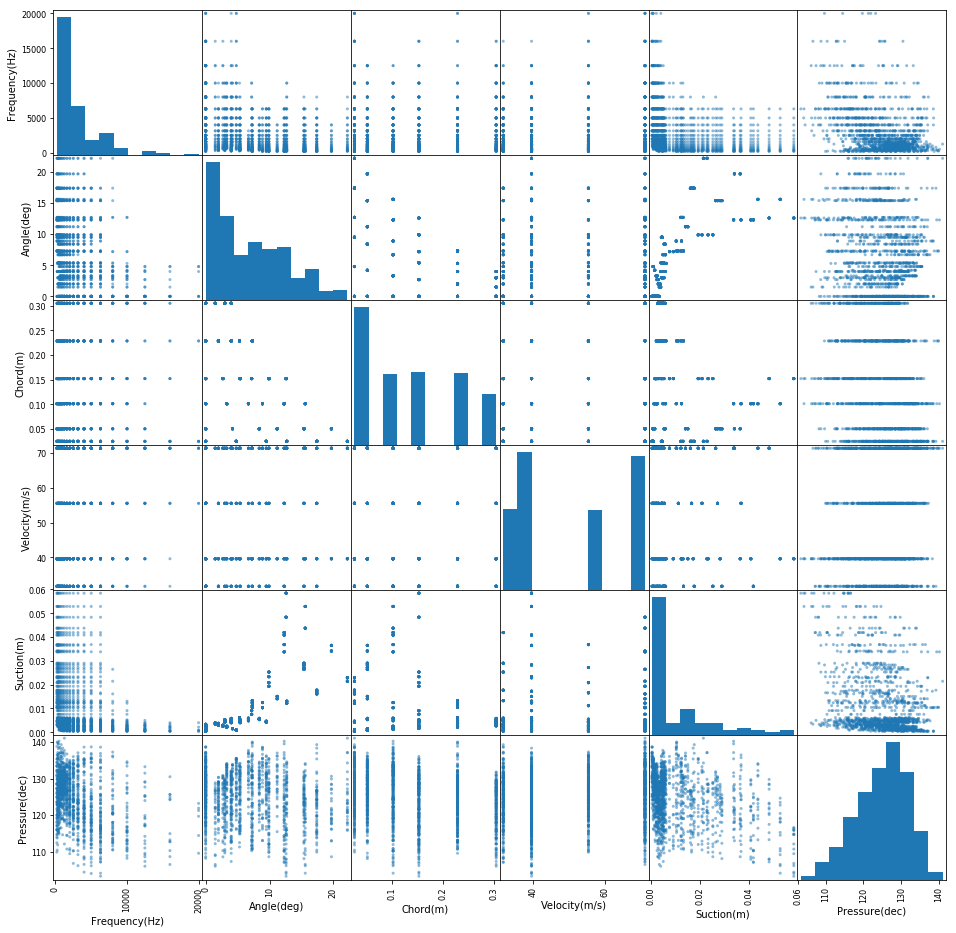

In [10]:
scatter_matrix(data, figsize=(16,16));

## Create training and test sets

Split the dataset into a training set and test set. But first, split the data into input features and output features. Here, `X` represents the input features or the independent variables that will be used for predicting the output value represented by `Y`.

In [11]:
array = data.values # get data values 

In [12]:
X = array[:,0:5] # split data into input features (independent variables)

In [13]:
Y = array[:,5] # this is the prediction feature

Now split data `array` into training and test sets.

In [14]:
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Train the model

Or fit data to the model by first creating a decision tree object.

In [15]:
dt = DecisionTreeRegressor(max_depth=4)

In [16]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## Make predictions
Use the test set to make predictions.

In [17]:
Y_predicted = dt.predict(X_test)

## Determine accuracy of predictions

In [18]:
from sklearn import metrics

In [19]:
# calculate accuracy
dt.score(X_test, Y_predicted)

1.0

The `score` functions returns a coefficient of determination $R^2$, calculated as $$\dfrac{1}{1- \frac{u}{v}},$$ where $$u = \sum (Y test - Y predicted)^2$$ is the residual sum of squares, and 
$$v = \sum (Y_{}test = Y_{}test.mean)^2$$ is the total sum of squares. A score of `1.0` is preferred. It means the model was able to perfectly predict the output values.

## Visualize the decision tree
Import the necessary libraries. You may need to install pydotplus: `conda install -c conda-forge pydotplus`

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, 
                rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [ ]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Try creating a decision tree with max_depth=2 and comparing the resultsnt complexity and accuracy:

## Summary

To begin to make predictions and determine the accuracy of the predictions, load the data and visualize it to understand its distribution. Then split the data in training and test sets. Use the training set to fit the model; use the test set to make predictions. Thereafter evaluate the predictions of the model using functions provided by the `sklearn` package. In the example, data did not require too much preprocessing.